In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import re
import nltk


import warnings
warnings.filterwarnings('ignore')

In [49]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test_with_no_labels.csv")

In [50]:
train_df.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [51]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [52]:
train_df.shape

(15819, 3)

In [53]:
#data types info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


preprocessing

In [54]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt

In [55]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [56]:
#remove twitter handles @user
train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['message'],"@[\w]" )

In [57]:
train_df.head()

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,It's not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT awStory: Researchers say we have three year...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT oyNovioDeTodas: It's 2016, and a racist, se..."


In [58]:
#remove special characters
train_df['clean_tweet']= train_df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
train_df.head()

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn t think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,It s not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT awStory Researchers say we have three year...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,RT oyNovioDeTodas It s and a racist se...


In [59]:
#remove short words
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
train_df.head()

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor chief doesn think carbon dioxide ...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,awStory Researchers have three years climate c...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED pivotal year climate chan...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,oyNovioDeTodas racist sexist climate change de...


In [60]:
#tokenize
tokenized_tweet = train_df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [PolySciMajor, chief, doesn, think, carbon, di...
1    [like, lack, evidence, anthropogenic, global, ...
2    [awStory, Researchers, have, three, years, cli...
3    [#TodayinMaker#, WIRED, pivotal, year, climate...
4    [oyNovioDeTodas, racist, sexist, climate, chan...
Name: clean_tweet, dtype: object

In [61]:
#stem the words
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda message:[stemmer.stem(word) for word in message])
tokenized_tweet.head()

0    [polyscimajor, chief, doesn, think, carbon, di...
1        [like, lack, evid, anthropogen, global, warm]
2    [awstori, research, have, three, year, climat,...
3    [#todayinmaker#, wire, pivot, year, climat, ch...
4    [oynoviodetoda, racist, sexist, climat, chang,...
Name: clean_tweet, dtype: object

In [62]:
#combine words into single sentence
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
train_df["clean_tweet"] = tokenized_tweet
train_df.head()

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor chief doesn think carbon dioxid m...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,awstori research have three year climat chang ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wire pivot year climat chang ht...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,oynoviodetoda racist sexist climat chang deni ...


In [63]:
#lamentize
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()


In [64]:
#try and do lamentization
#find the code that wil work

EXPLORATORY DATA ANALYSIS

In [65]:
##pip install wordcloud

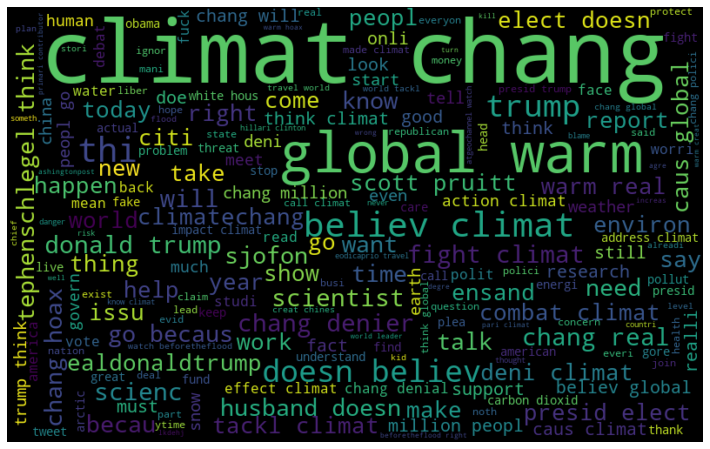

In [66]:
#visualize frequent words
all_words = " ".join([sentence for sentence in train_df["clean_tweet"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

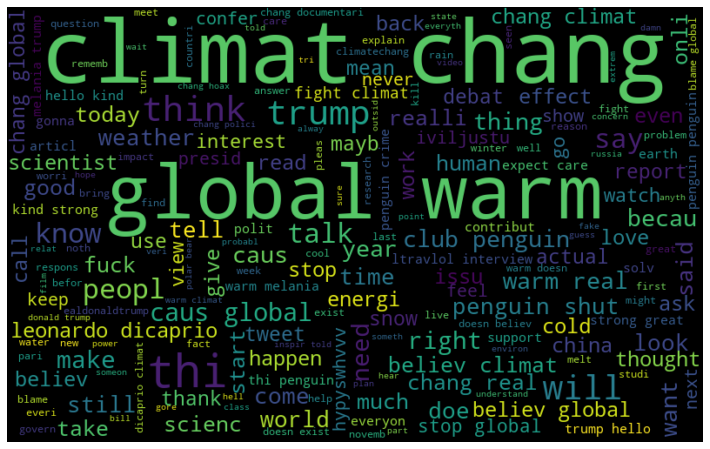

In [67]:
##frequent words about factual news
all_words = " ".join([sentence for sentence in train_df["clean_tweet"][train_df["sentiment"]==0]])

wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
##extract hashtahgs
def hashtag_extract(tweets):
    hashtags = []
    ###loop words in tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [69]:
##extract sentiment tweets
ht_positive = hashtag_extract(train_df['clean_tweet'][train_df['sentiment']==1])

ht_factual = hashtag_extract(train_df['clean_tweet'][train_df['sentiment']==2])

ht_negative = hashtag_extract(train_df['clean_tweet'][train_df['sentiment']==-1])

ht_neutral = hashtag_extract(train_df['clean_tweet'][train_df['sentiment']==0])






In [70]:
ht_positive[:5]

[[], [], ['todayinmaker'], ['electionnight'], []]

In [71]:
##unest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_factual = sum(ht_factual, [])
ht_neutral = sum(ht_neutral, [])


In [72]:
ht_positive[:5]

['todayinmaker', 'electionnight', 'climatemarch', 'saveourplanet', 'cop']

In [74]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,todayinmaker,1
1,electionnight,10
2,climatemarch,13
3,saveourplanet,1
4,cop,71


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

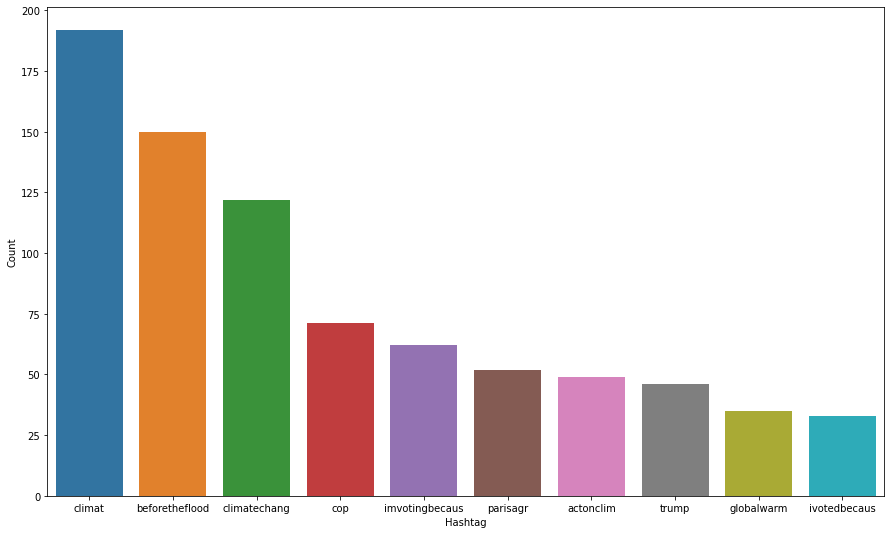

In [75]:
##select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x= 'Hashtag', y = 'Count')

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
# Converting the collection of clean messages to a matrix of token counts
corpus = train_df['message']

vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.toarray())

In [89]:
 #Converting the collection of clean messages to a matrix of TF-IDF features
data = train_df['message']

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
vectorized = vectorizer.fit_transform(data)
#print(vectorizer.get_feature_names())
#print(X.toarray())

In [90]:
# Using sparse to train the model using both representations.
import scipy.sparse

# Defining the features as well as the label
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = train_df['sentiment']

In [91]:
from sklearn.model_selection import train_test_split

# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
# Creating a list of all the models to train
lm = LogisticRegression(random_state = 5)

In [93]:
lm.fit(X_train,y_train)

LogisticRegression(random_state=5)

In [94]:
pred_lm = lm.predict(X_test)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print('Classification Report')
print(classification_report(y_test, pred_lm))

Classification Report
              precision    recall  f1-score   support

          -1       0.68      0.44      0.53       428
           0       0.58      0.49      0.53       737
           1       0.78      0.84      0.81      2861
           2       0.75      0.78      0.77      1195

    accuracy                           0.75      5221
   macro avg       0.70      0.64      0.66      5221
weighted avg       0.74      0.75      0.74      5221

